# Mandatory Assignment 1

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Sunday, August 19, 2018.**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Can i work with my group?: **yes**

The assigment consist of one to tree problems from each of the exercise sets you have solved so far (excluding Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

## Problems from Exercise Set 2:

> **Ex. 2.2**: Make two lists. The first should be numbered. The second should be unnumbered and contain at least one sublevel. 

# [Answer to Ex. 2.2 here] (convert to markdown cell)
1. list1
2. list1

Second list
- number 1
- number 2

#Convert to markdown with shortcut 'M'

## Problems from Exercise set 3:

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence `"Is r > g?"` using your knowledge about string formatting. Store this new string in a variable called `answer_31`. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [10]:
# [Answer to Ex. 3.1.3 here]
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']

# answer_31 = 

# YOUR CODE HERE


answer_31 = "{} {} {} {}{}".format(l1[1], l1[0].strip(), l1[2], l1[4].strip(), l1[5])


In [11]:
assert answer_31 == "Is r > g?"

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`. Store the result in a new variable called `answer_32`.
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [134]:
# [Answer to Ex. 3.1.4 here]
#W = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']

# answer_32 = 


# YOUR CODE HERE
v = ['a', 'e', 'i', 'o', 'u']

def vowel(x):
    if x[0] in v:
        return True 
    else:
        return False 
    
word = {}
W = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']

for x in W:
    word[x] = vowel(x)

answer_32 = word

In [135]:
assert answer_32 == {i: i[0] in 'aeiou' for i in W}
assert sorted(answer_32) == sorted(W)

> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` which you defined in the previous question (ex 3.3.1) to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.
>
> Store the birth data in a new variable called `answer_33`.
>
>> _Hint:_ The `requests.response` object has a `.json()` method. 
>
>> _Note:_ you wrote `construct_link()` in 3.3.1, if you didn't heres the link you need to get: `https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*`

In [136]:
# [Answer to Ex. 3.3.2 here]

# answer_33 = 

# YOUR CODE HERE
import requests

server_url = 'https://api.statbank.dk/' # no need for authentication
endpoint_path = 'v1/tableinfo/folk1a?format=JSON'

url = server_url + endpoint_path
print(url)
import requests # import the module
response = requests.get(url) # submit query with `get` and save response 


def construct_url(table, var):
    server_url = 'https://api.statbank.dk'
    endpoint_path = '/v1/data/{w}/JSONSTAT?lang=en'.format(w=table)
    
    for v in var:
        endpoint_path += '&{r}'.format(r=v)
    
    url = server_url + endpoint_path
    
    return url

s = construct_url('FOD', ['Tid=*', 'BARNKON=P'])
response = requests.get(s)
answer_33 = response.json()
#print(data)

import pprint
#pprint.pprint(data)
girls = answer_33['dataset']['value']
print(girls)

https://api.statbank.dk/v1/tableinfo/folk1a?format=JSON
[34996, 34771, 35260, 31533, 30055, 30161, 28909, 27941, 25972, 25595, 24821, 25228, 26284, 26878, 27142, 28520, 29876, 30813, 31353, 32914, 32760, 34027, 33885, 32819, 32899, 32116, 32341, 32652, 31961, 31109, 31441, 31539, 31459, 31580, 31267, 31507, 30557, 30946, 28984, 28131, 27283, 27616, 28357, 29833, 29930, 29865]


In [137]:
assert sorted(answer_33['dataset'].keys()) == ['dimension', 'label', 'source', 'updated', 'value']
assert 'BARNKON' in answer_33['dataset']['dimension'].keys()

## Problems from exercise set 4


In [138]:
import numpy as np
import pandas as pd

> **Ex. 4.1.1:** Use Pandas' CSV reader to fetch  daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/). Store the dataframe in a variable called `answer_41`.
>
>> *Hint 1*: for compressed files you may need to specify the keyword `compression`.
>
>> *Hint 2*: keyword `header` can be specified as the CSV has no column names.
>
>> *Hint 3*: Specify the path, as the URL linking directly to the 1864 file. 

In [139]:
# [Answer to Ex. 4.1.1 here]

# answer_41 = 

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'
df = pd.read_csv(url, sep=',',compression='gzip', header=None) 
answer_41 = df

In [140]:
assert answer_41.shape == (27349, 8)
assert list(answer_41.columns) == list(range(8))

> **Ex. 4.1.2:** Structure your weather DataFrame by using only the relevant columns (station identifier, data, observation type, observation value), rename them. Make sure observations are correctly formated (how many decimals should we add? one?).
>
> Store the resulting dataframe in a new variable called `answer_42`.
>
>> *Hint:* rename can be done with `df.columns=COLS` where `COLS` is a list of column names.

In [141]:
# [Answer to Ex. 4.1.2 here]

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'
df_sorted = pd.read_csv(url, sep=',',compression='gzip', names=['Station_ID', 'Date', 'Observation_type', 'Observation_value', 'Unnamed:4', 'Unnamed:5', 'E','Unnamed:7']) 
df.head(10)

del df_sorted['Unnamed:4']
del df_sorted['Unnamed:5']
del df_sorted['E']
del df_sorted['Unnamed:7']

df_sorted['Observation_value'] = df_sorted['Observation_value'] / 10

answer_42 = df_sorted
df_sorted.head(10)

,Station_ID,Date,Observation_type,Observation_value
0,ITE00100550,18640101,TMAX,1.0
1,ITE00100550,18640101,TMIN,-2.3
2,ITE00100550,18640101,PRCP,2.5
3,ASN00079028,18640101,PRCP,0.0
4,USC00064757,18640101,PRCP,11.9
5,SF000208660,18640101,PRCP,0.0
6,ASN00089000,18640101,PRCP,0.0
7,SWE00100003,18640101,PRCP,0.0
8,ASN00086071,18640101,TMAX,21.4
9,ASN00086071,18640101,TMIN,10.1


In [142]:
assert answer_42.shape == (27349, 4)
assert 144.8 in [answer_42[i].max() for i in answer_42]
assert -666.0 in [answer_42[i].min() for i in answer_42]
assert 18640101 in [answer_42[i].min() for i in answer_42]

> **Ex. 4.1.3:**  Select data for the station `ITE00100550` and only observations for maximal temperature. Make a copy of the DataFrame. Explain in a one or two sentences how copying works.
>
> Store the subsetted dataframe in a new variable called `answer_43`.
>
>> *Hint 1*: the `&` operator works elementwise on boolean series (like `and` in core python).
>
>> *Hint 2*: copying of the dataframe is done with the `copy` method for DataFrames.

In [143]:
# [Answer to Ex. 4.1.3 here]

# YOUR CODE HERE
df_short = df_sorted[(df_sorted['Station_ID'] == 'ITE00100550') & (df_sorted['Observation_type'] == 'TMAX')]

df_station = df_short.copy()
answer_43 = df_station
#df_station.head(10)

In [144]:
assert 'ITE00100550' in [answer_43[i].min() for i in answer_43]
assert 'ITE00100550' in [answer_43[i].max() for i in answer_43]
assert 'TMAX' in [answer_43[i].min() for i in answer_43]
assert 'TMAX' in [answer_43[i].max() for i in answer_43]

> **Ex. 4.1.4:** Make a new column in `answer_44` called `TMAX_F` where you have converted the temperature variables to Fahrenheit. Make sure not to overwrite `answer_43`.
>
> Store the resulting dataframe in a variable called `answer_44`.
>
>> *Hint*: Conversion is $F = 32 + 1.8*C$ where $F$ is Fahrenheit and $C$ is Celsius.

In [145]:
# [Answer to Ex. 4.1.4 here]
answer_44 = answer_43.copy()
# answer_44 = 

# YOUR CODE HERE

answer_44['TMAX_F'] = 32 + 1.8 * answer_44['Observation_value']

In [146]:
assert set(answer_44.columns) -  set(answer_43.columns) == {'TMAX_F'}

## Problems from exercise set 5

In [162]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

> **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
AxesSubplot(0.125,0.125;0.775x0.755)


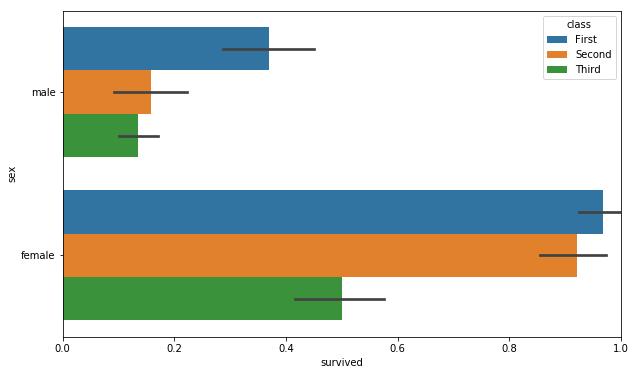

In [163]:
# [Answer to Ex. 5.1.1]


print(titanic.head(5))
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_xlim([0, 1])
ax.set_ylim([0, 4])

print(sns.barplot(x="survived", y="sex", data=titanic , hue="class"))  # Using seaborn to plot the barplot


# It is not possible to plot it as a boxplot, as the passengers either survived or not. A boxplot depicts numerical data through quartile variance.

> **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

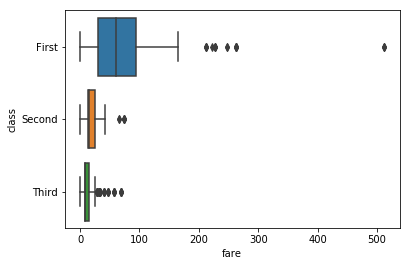

In [165]:
#Bonus
sns.boxplot(x="fare", y="class" , data=titanic)

Text(0,0.5,'Sepal Lenght')

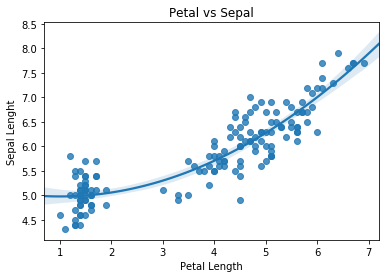

In [164]:
# [Answer to Ex. 5.1.2]
# print(iris.head(2))


sns.regplot(x="petal_length" , y="sepal_length", data=iris, order=2)

plt.title('Petal vs Sepal')
plt.xlabel("Petal Length")
plt.ylabel("Sepal Lenght")

# It is a meaningful way to display the data


> **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

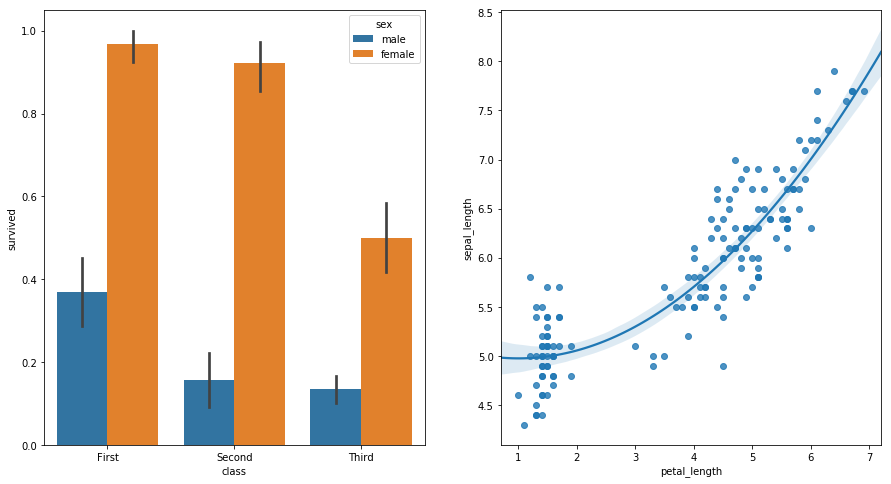

In [166]:
# [Answer to Ex. 5.1.3]

import matplotlib.pyplot as plt

two_panel = f, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(  y="survived", x= "class", hue="sex" ,data=titanic , ax=axes[0])
sns.regplot(  y="sepal_length", x= "petal_length", data=iris, order=2, ax=axes[1])

plt.savefig("two_panel.png")

> **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa


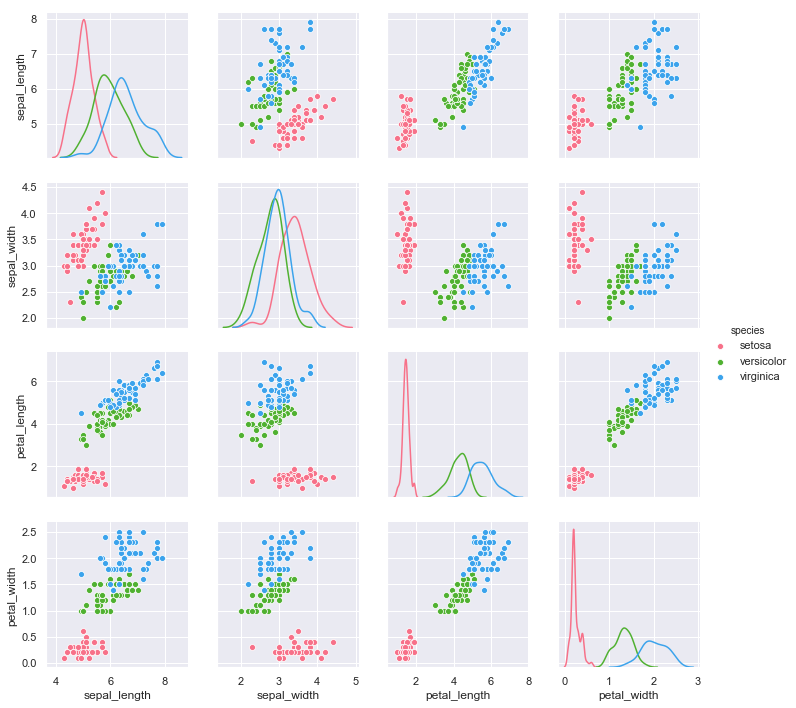

In [167]:
# [Answer to Ex. 5.1.4]

print(iris.head(2))

# sns.pairplot(iris)
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
# g = sns.pairplot(iris)

sns.set(color_codes=True)
g= sns.pairplot(iris, hue="species",  palette="husl",diag_kws=dict(shade=False) )

## Problems from exercise set 6

> _Note:_ In the exercises we asked you to download weather data from the NOAA website. For this assignment the data are loaded in the following code cell into two pandas dataframes.

In [147]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

weather_1864 = pd.read_csv('weather_data_1864.csv')

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.
>
> Create a new column in `weather_1864` called `answer_61` and store the country codes here.
>
>> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module.

In [148]:
# [Answer to Ex. 6.1.4]
import re

weather_1864['answer_61'] = weather_1864['station'].str.extract('([a-zA-Z]+)')

In [149]:
assert sorted(weather_1864['answer_61'].str[:2].unique()) == sorted(['SZ', 'CA', 'EZ', 'GM', 'AU', 'IT', 'BE', 'UK', 'EI', 'AG', 'AS'])

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 
>
> Name your function `prepareWeatherData`.

In [150]:
# [Answer to Ex. 6.1.5]
def prepareWeatherData(year):
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{id}.csv.gz'.format(id = year)

    df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    df_select = df_weather[(df_weather.obs_type == 'TMAX')].copy()
    df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
    df_sorted["datetime_dt"] = pd.to_datetime(df_sorted['datetime'], format="%Y%m%d")
    df_sorted.set_index(['datetime_dt'])
    df_sorted["country"] = df_sorted['station'].str.extract('([a-zA-Z]+)')
    return df_sorted

In [151]:
assert prepareWeatherData('1864').shape == (5686, 6)

## Problems from exercise set 7

> _Note:_ Once again if you haven't managed to download the data from NOAA, you can refer to the github repo to get csv-files containing the required data.

In [152]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

> **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864. 

> *Hint*: the method `describe` computes all these measures.

In [153]:
# [Answer to Ex. 7.1.1]
import requests 
import pandas as pd

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
df_sorted["datetime_dt"] = pd.to_datetime(df_sorted['datetime'], format="%Y%m%d")
df_sorted['month'] = df_sorted.datetime_dt.dt.month
#df_sorted.head()
df_sorted.describe()


,datetime,obs_value,TMAX_F,month
count,3.660000e+02,366.000000,366.000000,366.000000
mean,1.864067e+07,16.249727,61.249508,6.513661
std,3.457653e+02,10.158772,18.285789,3.455958
min,1.864010e+07,-6.300000,20.660000,1.000000
25%,1.864040e+07,7.600000,45.680000,4.000000
50%,1.864070e+07,16.150000,61.070000,7.000000
75%,1.864098e+07,25.325000,77.585000,9.750000
max,1.864123e+07,34.800000,94.640000,12.000000


> **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 
>
> Name the concatenated data `answer_72`

In [154]:
# [Answer to Ex. 7.1.2]
def b(year):
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{y}.csv.gz'.format(y=year)

    df_weather = pd.read_csv(url,
                             compression='gzip',
                             header=None).iloc[:,:4]

    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    df_select = df_weather[(df_weather.obs_type == 'TMAX')].copy()
    df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
    df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
    df_sorted["datetime_dt"] = pd.to_datetime(df_sorted['datetime'], format="%Y%m%d")
    df_sorted['month'] = df_sorted.datetime_dt.dt.month
    return df_sorted
ITE_station1864 = b(1864)
ITE_station1865 = b(1865)
ITE_station1866 = b(1866)
ITE_station1867 = b(1867)


ITE_st_all = [ITE_station1864, ITE_station1865, ITE_station1866 , ITE_station1867]
#print(ITE_st_all)

concatITE = pd.concat(ITE_st_all, axis=0, join="outer", sort=False )
answer_72 = concatITE

In [155]:
assert answer_72.shape == (30003, 7)

> **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.  
>
> Store the merged data in a new variable called `answer_73`.
>
> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [156]:
# [Answer to Ex. 7.1.3]
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'

col = ['station', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATE', 'NAME', 'GSN FLAG', 'HCN/CRN FLAG', 'WMO ID']
#make and save DataFrame for new URL
new = pd.read_fwf(url, names=col) #fwf = fixed width format

#station and ID=station
col2 = [ITE_st_all, new]

concatITE2 = pd.merge(concatITE, new, on='station', how='inner')

answer_73 = concatITE2

In [157]:
assert answer_73.shape == (5686, 15) or answer_73.shape == (30003, 15)

## Problems from exercise set 8

> **Ex. 8.1.2.:** Use the `request` module to collect the first page of job postings.
>
> Store the response.json() object in a new variable called `answer_81`.
> 

In [158]:
# [Answer to Ex. 8.1.2]
import requests
import json

url = 'https://job.jobnet.dk/CV/FindWork/Search'
r = requests.get(url)

answer_81 = r.json()

In [159]:
assert sorted(answer_81.keys()) == sorted(['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount'])

> **Ex. 8.1.3.:** Store the 'TotalResultCount' value for later use. Also create a dataframe from the 'JobPositionPostings' field in the json. Name this dataframe `answer_82`.

In [160]:
# [Answer to Ex. 8.1.3]
TotalResultCount = r.json()['TotalResultCount']
answer_82 = pd.DataFrame((r.json()["JobPositionPostings"]))

In [161]:
assert answer_82.shape == (20,44)